<a href="https://colab.research.google.com/github/kriti524/Travel-Package-Prediction/blob/main/Travel_Package_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TRAVEL PACKAGE PREDICTION

# IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.combine import SMOTEENN
from xgboost import XGBClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, recall_score, precision_score, f1_score

import warnings
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# IMPORTING DATASET

In [ ]:
df = pd.read_csv('tour_package.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [ ]:
df.shape

(4888, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


**Observations:**

*Age:* Min: 18, Max: 61, Mean: 37

*MonthlyIncome:* Min: 1000, Max: 98678, Mean: 23619

*DurationOfPitch:* Min: 5 mins, Max: 127 mins

*NumberOfTrips:* Min: 1, Max: 22



In [ ]:
numeric_cols = df.describe().columns
categ_cols = df.drop(numeric_cols, axis=1).columns
for i in categ_cols:
    print('*'*50)
    print(f'{i}: {df[i].unique()}')

**************************************************
TypeofContact: ['Self Enquiry' 'Company Invited' nan]
**************************************************
Occupation: ['Salaried' 'Free Lancer' 'Small Business' 'Large Business']
**************************************************
Gender: ['Female' 'Male' 'Fe Male']
**************************************************
ProductPitched: ['Deluxe' 'Basic' 'Standard' 'Super Deluxe' 'King']
**************************************************
MaritalStatus: ['Single' 'Divorced' 'Married' 'Unmarried']
**************************************************
Designation: ['Manager' 'Executive' 'Senior Manager' 'AVP' 'VP']


# DATA PRE PROCESSING

In [ ]:
df['Gender'] = df['Gender'].replace('Fe Male', 'Female')
df.drop('CustomerID', axis=1, inplace=True)

In [ ]:
numeric_cols = df.describe().columns
categ_cols = df.drop(numeric_cols, axis=1).columns
categ_cols

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [ ]:
df[categ_cols].describe(include='all').T

,count,unique,top,freq
TypeofContact,4863,2,Self Enquiry,3444
Occupation,4888,4,Salaried,2368
Gender,4888,2,Male,2916
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Designation,4888,5,Executive,1842


## Creating Bins

### Age

In [ ]:
df['Age'].describe()

count    4662.000000
mean       37.622265
std         9.316387
min        18.000000
25%        31.000000
50%        36.000000
75%        44.000000
max        61.000000
Name: Age, dtype: float64

In [ ]:
df['Age_Bin'] = pd.cut(df['Age'], bins=[18, 25, 30, 40, 50, 70], labels=['18-25', '26-30', '31-40', '41-50', '51-65'])

### Monthly Income

In [ ]:
df['MonthlyIncome'].describe()

count     4655.000000
mean     23619.853491
std       5380.698361
min       1000.000000
25%      20346.000000
50%      22347.000000
75%      25571.000000
max      98678.000000
Name: MonthlyIncome, dtype: float64

In [ ]:
df['Salary_Bin'] = pd.cut(df['MonthlyIncome'], bins=[0, 15000, 20000, 25000, 30000, 35000, 40000, 50000, 100000], labels=['<15000', '<20000', '<25000', '<30000', '<35000', '<40000', '<50000', '<100000'])

In [ ]:
df['Salary_Bin'].value_counts()

Salary_Bin
<25000     2257
<20000     1038
<30000      768
<35000      382
<40000      206
<15000        2
<100000       2
<50000        0
Name: count, dtype: int64

# UNIVARIATE ANALYSIS

In [ ]:
df.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome', 'Age_Bin',
       'Salary_Bin'],
      dtype='object')

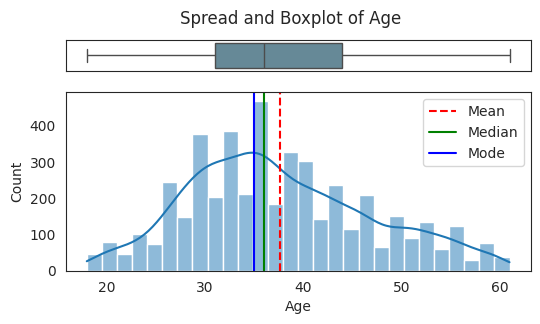

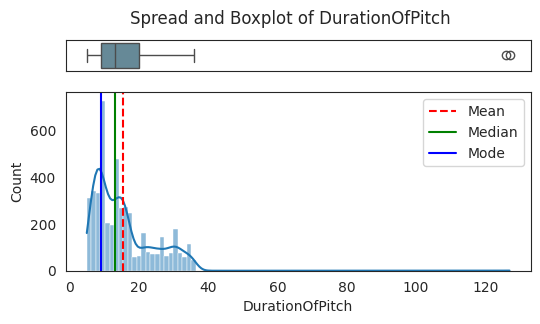

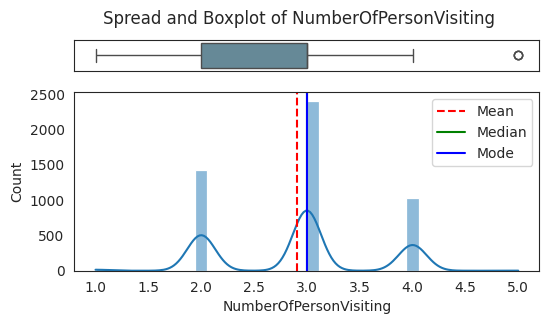

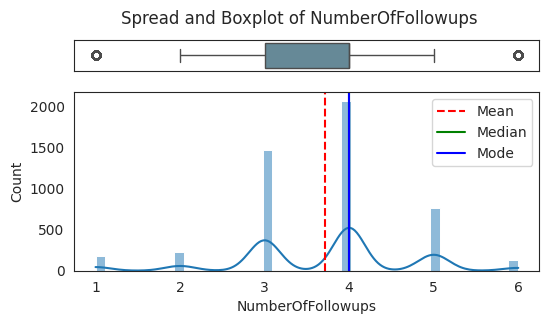

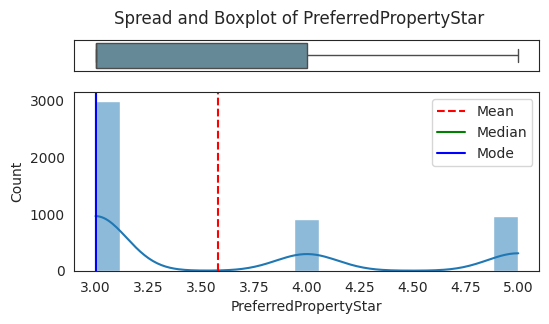

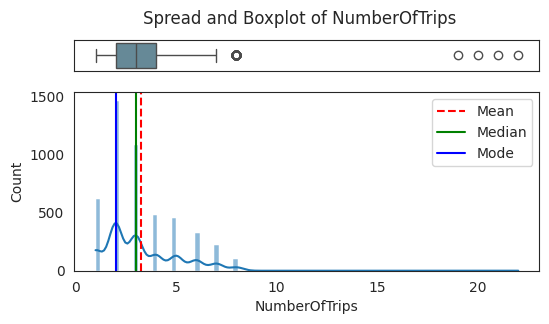

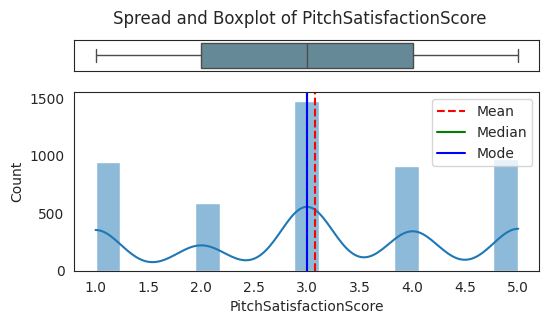

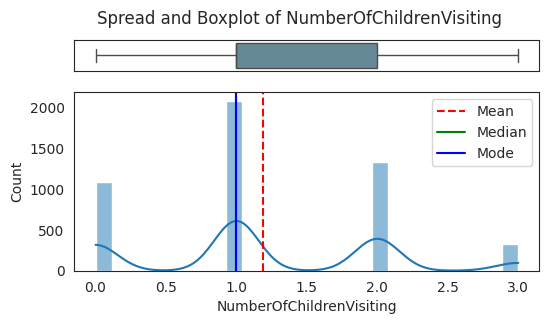

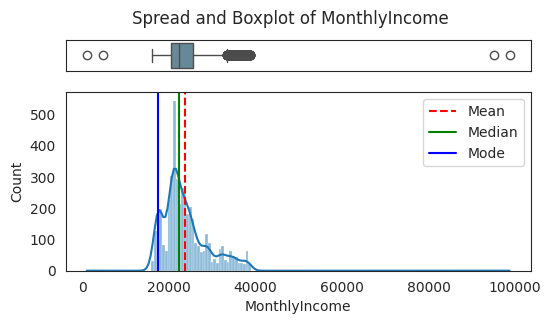

In [ ]:
cols = ['Age', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips',
        'PitchSatisfactionScore', 'NumberOfChildrenVisiting', 'MonthlyIncome']

for col in cols:
    fig, axs = plt.subplots(2, 1, figsize=(6, 3), sharex=True, gridspec_kw={'height_ratios': [0.15, 0.85]})

    sns.boxplot(x=df[col], ax=axs[0], color='#5E8D9F')
    axs[0].set(xlabel=None)

    sns.histplot(df[col], kde=True, ax=axs[1])
    axs[1].axvline(df[col].mean(), color='r', linestyle='--', label='Mean')
    axs[1].axvline(df[col].median(), color='g', linestyle='-', label='Median')
    axs[1].axvline(df[col].mode()[0], color='b', linestyle='-', label='Mode')
    axs[1].legend()

    plt.suptitle(f'Spread and Boxplot of {col}')
    plt.show()

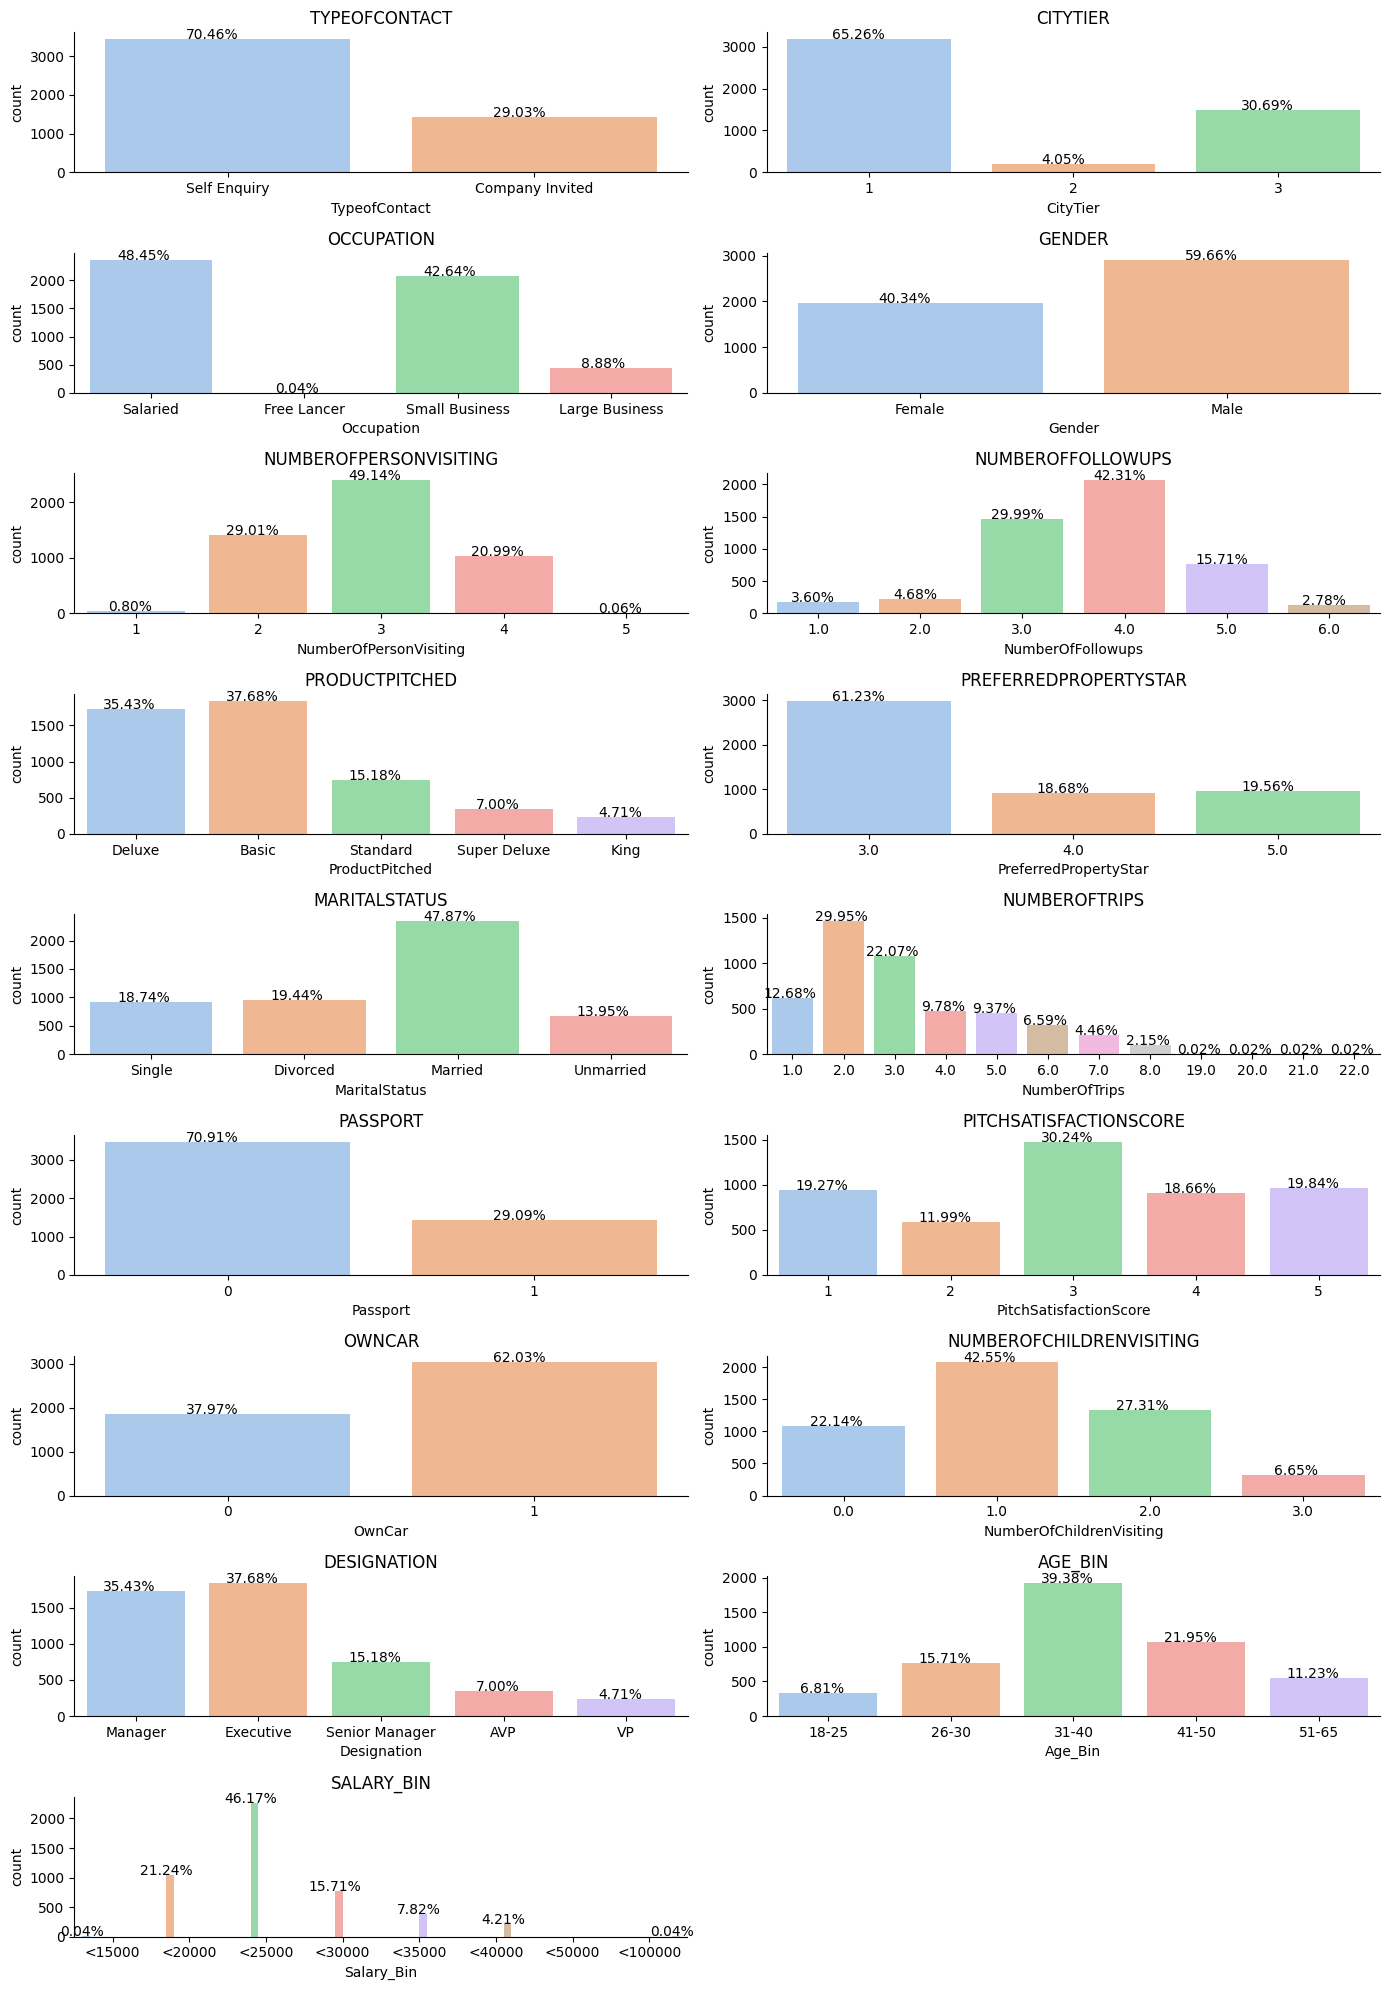

In [ ]:
plt.figure(figsize=(14, 20))

cols=['TypeofContact', 'CityTier',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'Age_Bin',
       'Salary_Bin']

colors = sns.color_palette("pastel")

for i, variable in enumerate(cols):
    plt.subplot(9, 2, i + 1)
    ax = sns.countplot(x=df[variable], hue=df[variable], data=df, palette=colors, legend=False)
    sns.despine(top=True, right=True, left=False)
    for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height() / len(df[variable]))
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plt.annotate(percentage, (x, y), ha='center')
    plt.tight_layout()
    plt.title(cols[i].upper())

plt.show()

# MULTIVARIATE ANALYSIS

In [ ]:
df2 = df.copy()
df2.drop(['ProdTaken'], axis=1, inplace=True)

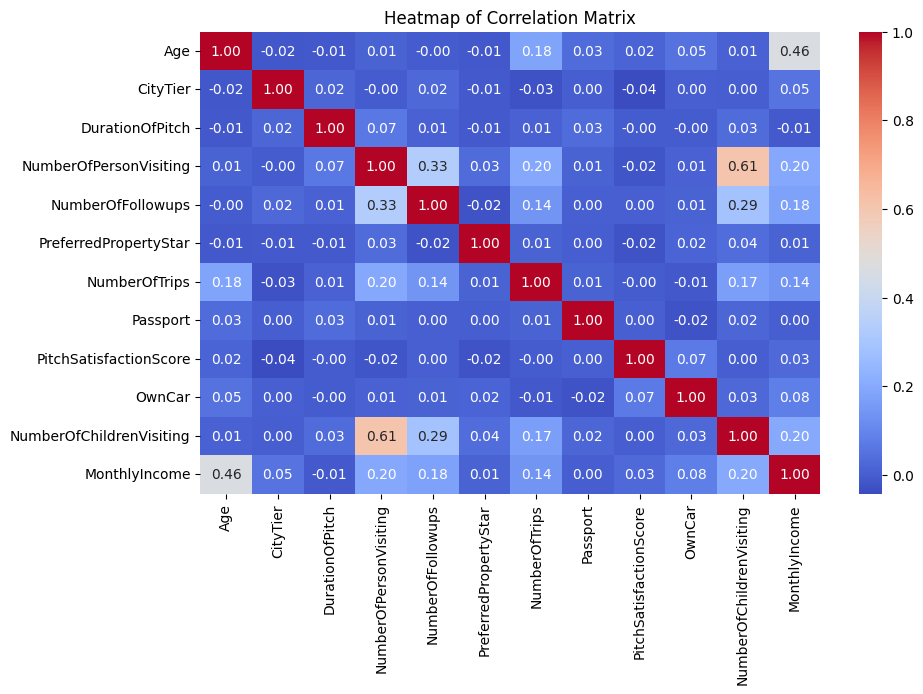

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df2[df2.describe().columns].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

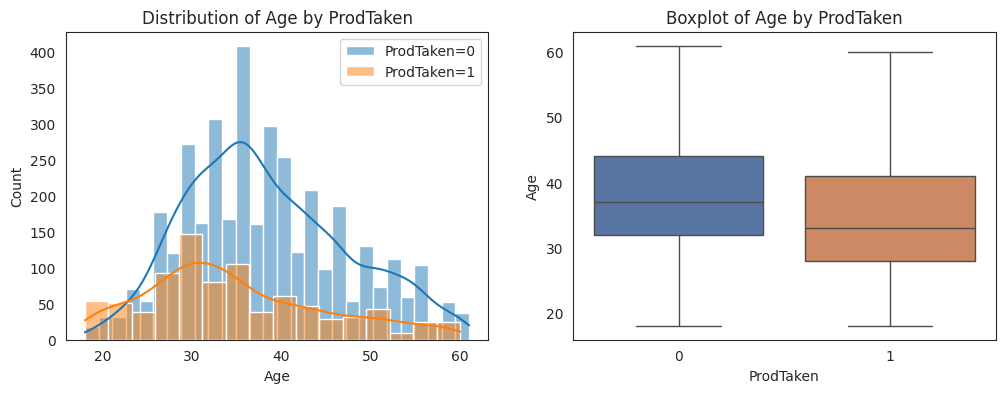

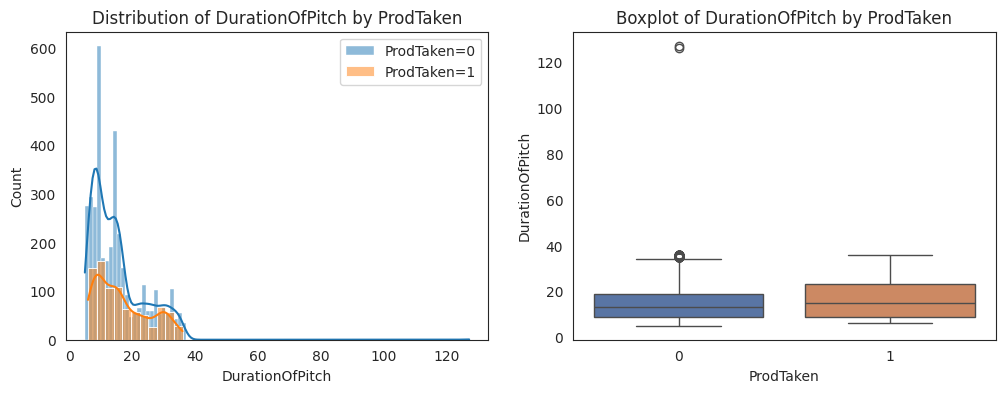

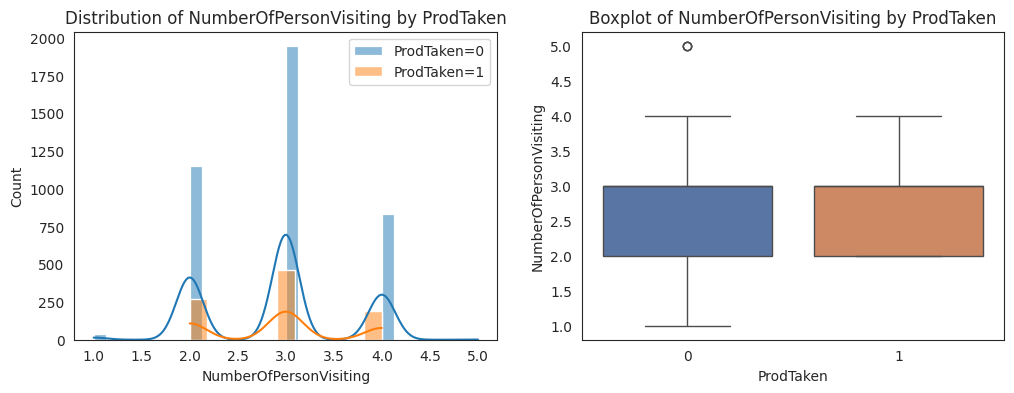

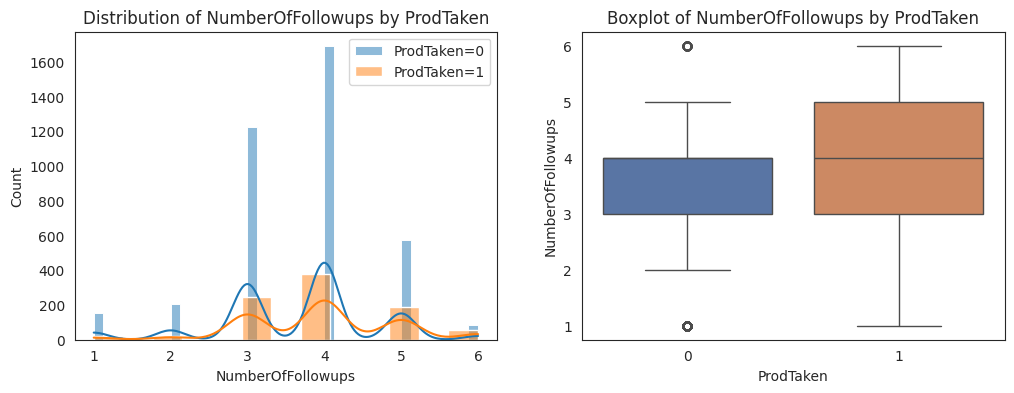

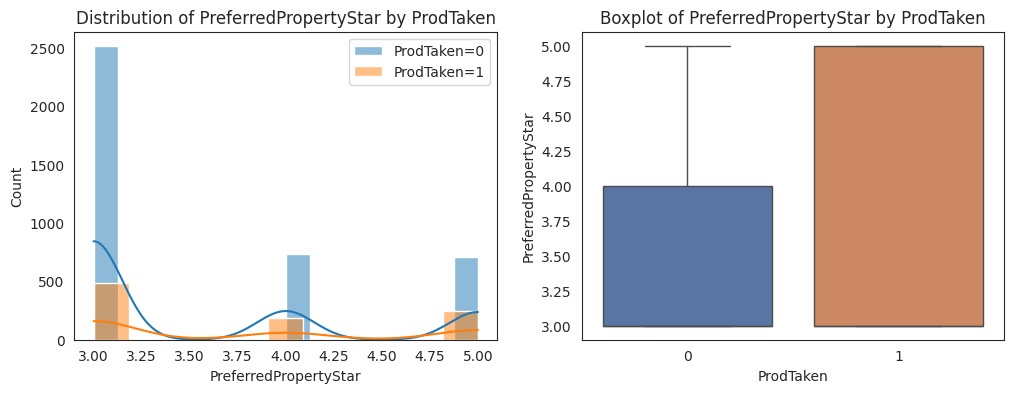

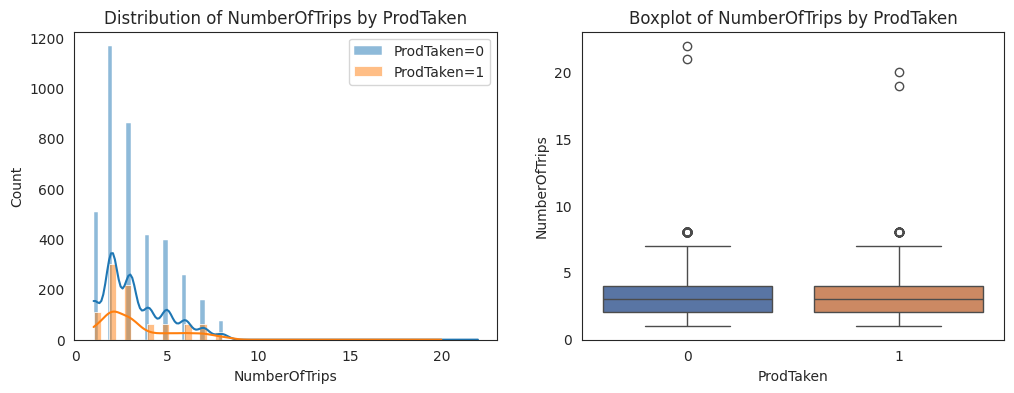

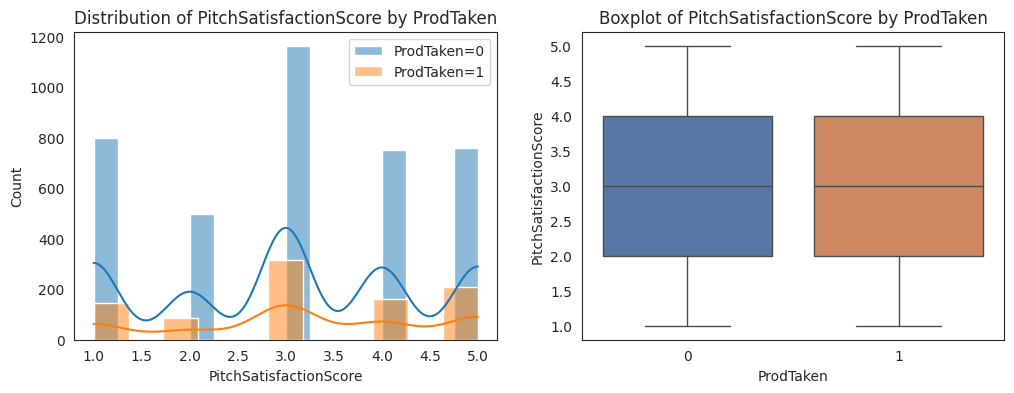

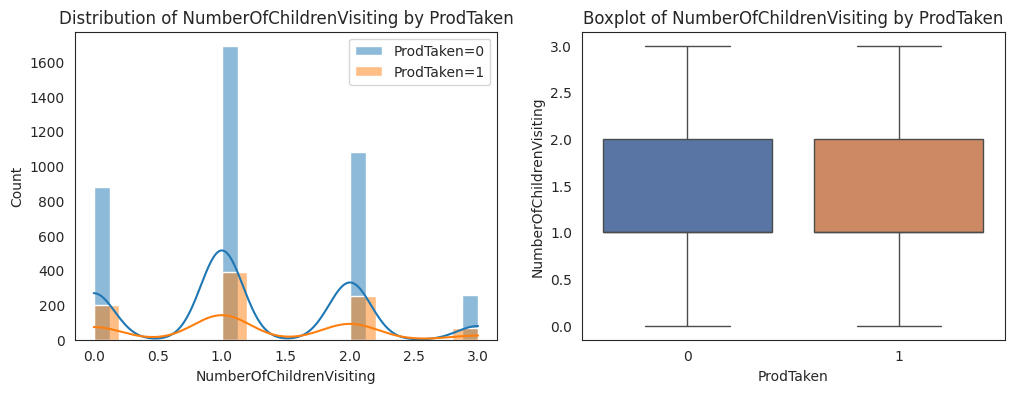

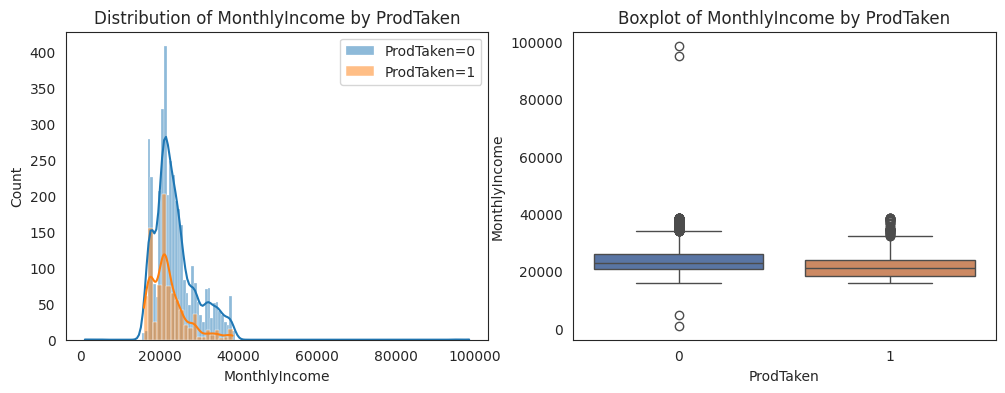

In [ ]:
columns = ['Age', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups',
           'PreferredPropertyStar', 'NumberOfTrips', 'PitchSatisfactionScore',
           'NumberOfChildrenVisiting', 'MonthlyIncome']

for col in columns:
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(df[df['ProdTaken'] == 0][col], label='ProdTaken=0', kde=True)
    sns.histplot(df[df['ProdTaken'] == 1][col], label='ProdTaken=1', kde=True)
    plt.legend()
    plt.title(f'Distribution of {col} by ProdTaken')

    plt.subplot(1, 2, 2)
    sns.boxplot(x='ProdTaken', y=col, data=df, palette='deep')
    plt.title(f'Boxplot of {col} by ProdTaken')

    plt.show()

## CUSTOMER PROFILE BY PRODUCT TYPE

In [ ]:
df.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome', 'Age_Bin',
       'Salary_Bin'],
      dtype='object')

In [ ]:
cust_prof = df[df['ProdTaken'] == 1]

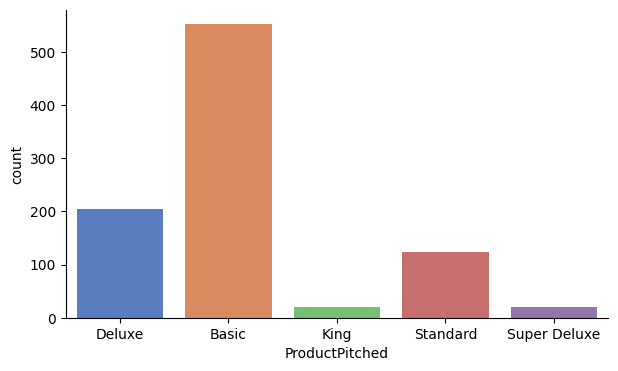

In [ ]:
plt.figure(figsize=(7, 4))
sns.countplot(data=cust_prof, x='ProductPitched', palette='muted')
sns.despine()
plt.show()

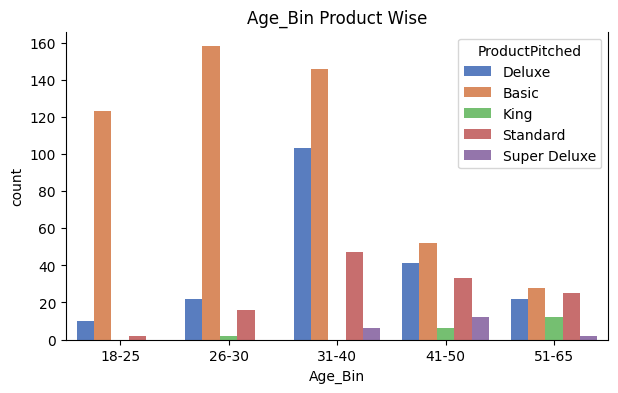

In [ ]:
plt.figure(figsize=(7, 4))
ax = sns.countplot(x='Age_Bin', hue='ProductPitched', data=cust_prof, palette='muted')
ax.set_title('Age_Bin Product Wise')
ax.spines['top'].set_visible(False)
plt.show()

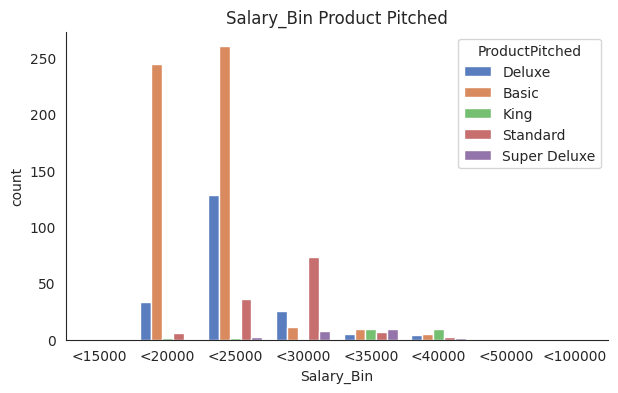

In [ ]:
sns.set_style("white")
plt.figure(figsize=(7, 4))
ax = sns.countplot(x='Salary_Bin', hue='ProductPitched', data=cust_prof, palette='muted')
ax.set_title('Salary_Bin Product Pitched')
sns.despine()
plt.show()

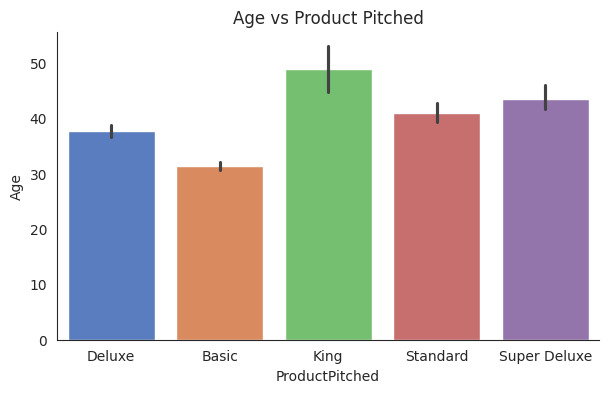

In [ ]:
sns.set_style("white")
plt.figure(figsize=(7, 4))
ax = sns.barplot(y='Age', x='ProductPitched', data=cust_prof, palette='muted')
ax.set_title('Age vs Product Pitched')
sns.despine()
plt.show()

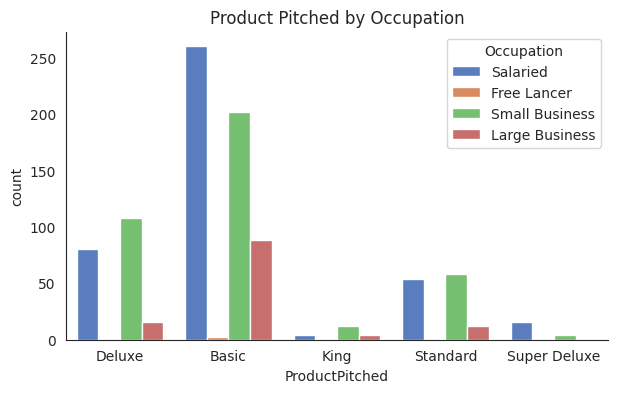

In [ ]:
sns.set_style("white")
plt.figure(figsize=(7, 4))
ax = sns.countplot(x="ProductPitched", data=cust_prof, hue="Occupation", palette='muted')
ax.set_title('Product Pitched by Occupation')
sns.despine()
plt.show()

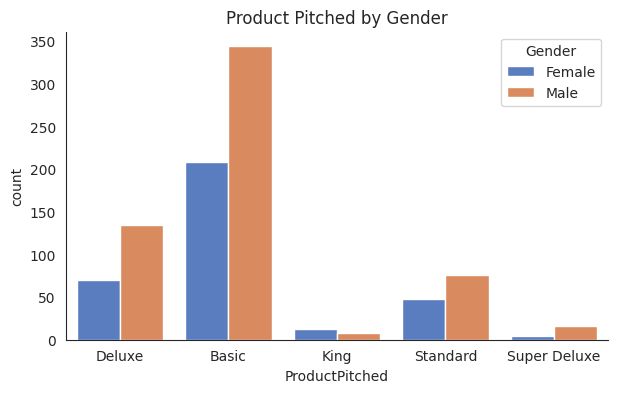

In [ ]:
sns.set_style("white")
plt.figure(figsize=(7, 4))
ax = sns.countplot(x="ProductPitched", data=cust_prof, hue="Gender", palette='muted')
ax.set_title('Product Pitched by Gender')
sns.despine()
plt.show()

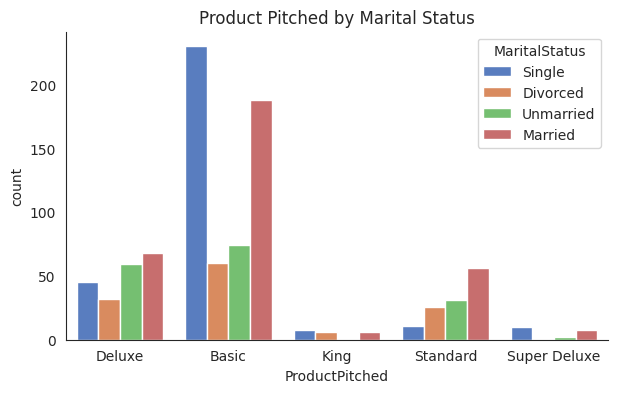

In [ ]:
sns.set_style("white")
plt.figure(figsize=(7, 4))
ax = sns.countplot(x="ProductPitched", data=cust_prof, hue="MaritalStatus", palette='muted')
ax.set_title('Product Pitched by Marital Status')
sns.despine()
plt.show()

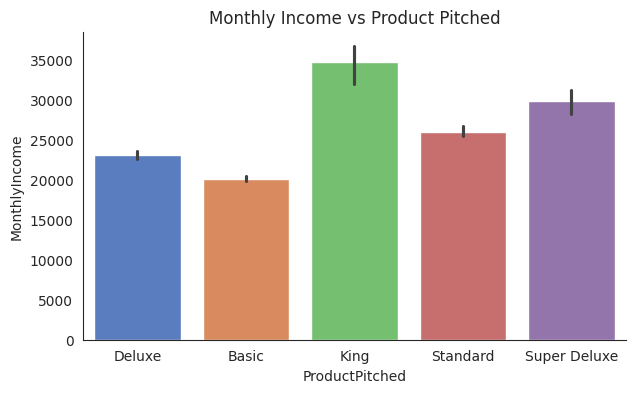

In [ ]:
sns.set_style("white")
plt.figure(figsize=(7, 4))
ax = sns.barplot(y='MonthlyIncome', x='ProductPitched', data=cust_prof, palette='muted')
ax.set_title('Monthly Income vs Product Pitched')
sns.despine()
plt.show()

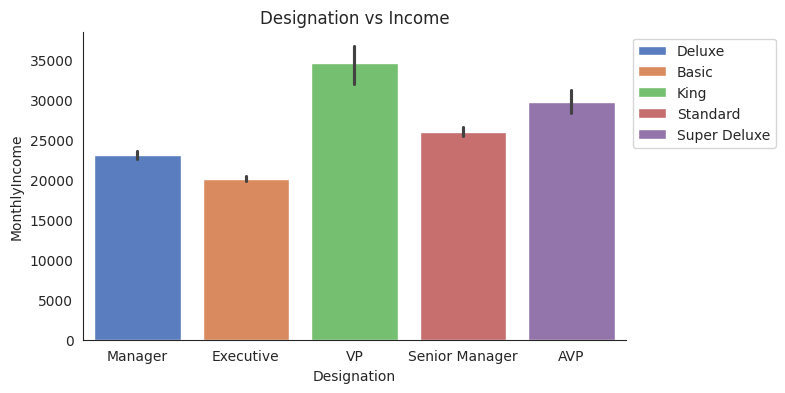

In [ ]:
sns.set_style("white")
plt.figure(figsize=(7, 4))
ax = sns.barplot(x='Designation', y='MonthlyIncome', data=cust_prof, hue='ProductPitched', palette='muted')
ax.set_title('Designation vs Income')
sns.despine()
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

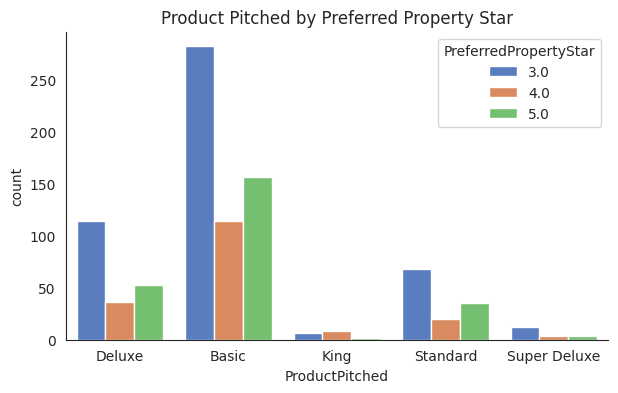

In [ ]:
sns.set_style("white")
plt.figure(figsize=(7, 4))
ax = sns.countplot(x="ProductPitched", data=cust_prof, hue="PreferredPropertyStar", palette='muted')
ax.set_title('Product Pitched by Preferred Property Star')
sns.despine()
plt.show()

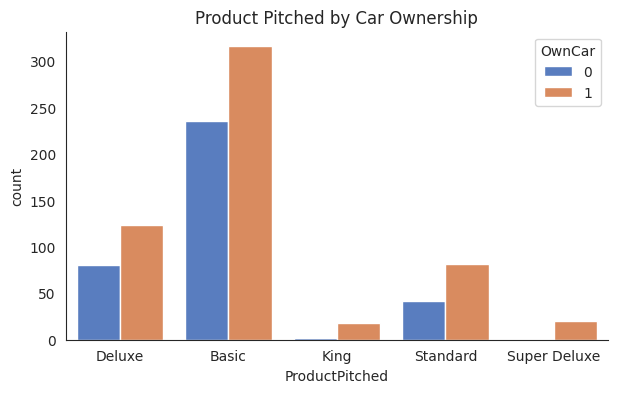

In [ ]:
sns.set_style("white")
plt.figure(figsize=(7, 4))
ax = sns.countplot(x="ProductPitched", data=cust_prof, hue="OwnCar", palette='muted')
ax.set_title('Product Pitched by Car Ownership')
sns.despine()
plt.show()

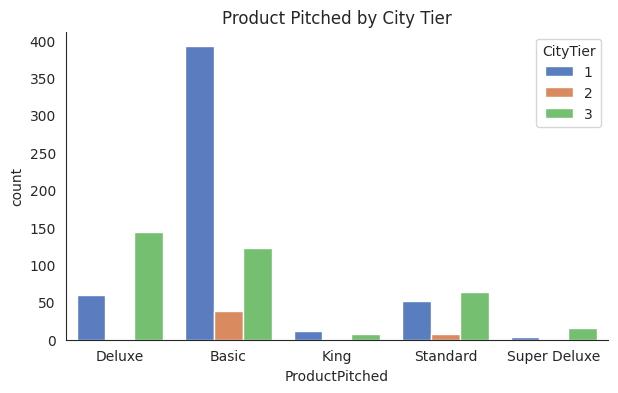

In [ ]:
sns.set_style("white")
plt.figure(figsize=(7, 4))
ax = sns.countplot(x="ProductPitched", data=cust_prof, hue="CityTier", palette='muted')
ax.set_title('Product Pitched by City Tier')
sns.despine()
plt.show()

In [ ]:
cust_prof.groupby('ProductPitched').agg({'MonthlyIncome': ['mean', 'min', 'max'], 'Age': ['mean', 'min', 'max']})

MonthlyIncome                          Age            
                        mean      min      max       mean   min   max
ProductPitched                                                       
Basic           20161.529301  16009.0  37868.0  31.289320  18.0  59.0
Deluxe          23106.215385  17086.0  38525.0  37.641414  21.0  59.0
King            34672.100000  17517.0  38537.0  48.900000  27.0  59.0
Standard        26035.419355  17372.0  38395.0  41.008130  19.0  60.0
Super Deluxe    29823.800000  21151.0  37502.0  43.500000  39.0  56.0

#### BASIC PACKAGE

In [ ]:
cust_prof[cust_prof['ProductPitched']=='Basic'].describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,552.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Age,515.0,31.289320,9.070829,18.0,25.0,30.0,35.0,59.0
CityTier,552.0,1.510870,0.832566,1.0,1.0,1.0,2.0,3.0
DurationOfPitch,532.0,15.791353,7.906926,6.0,9.0,14.0,22.0,36.0
NumberOfPersonVisiting,552.0,2.905797,0.701439,2.0,2.0,3.0,3.0,4.0
NumberOfFollowups,548.0,3.950730,0.967166,1.0,3.0,4.0,5.0,6.0
PreferredPropertyStar,552.0,3.771739,0.861812,3.0,3.0,3.0,5.0,5.0
NumberOfTrips,547.0,3.226691,2.081618,1.0,2.0,3.0,4.0,20.0
Passport,552.0,0.583333,0.493454,0.0,0.0,1.0,1.0,1.0
PitchSatisfactionScore,552.0,3.213768,1.353074,1.0,2.0,3.0,4.0,5.0


In [ ]:
cust_prof[cust_prof['ProductPitched']=='Basic'].select_dtypes(exclude=['int64', 'float64']).describe().T

,count,unique,top,freq
TypeofContact,549,2,Self Enquiry,355
Occupation,552,4,Salaried,260
Gender,552,2,Male,344
ProductPitched,552,1,Basic,552
MaritalStatus,552,4,Single,230
Designation,552,1,Executive,552
Age_Bin,507,5,26-30,158
Salary_Bin,529,5,<25000,260


#### DELUXE PACKAGE

In [ ]:
cust_prof[cust_prof['ProductPitched']=='Deluxe'].describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,204.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Age,198.0,37.641414,8.469575,21.0,32.0,35.5,44.0,59.0
CityTier,204.0,2.411765,0.913532,1.0,1.0,3.0,3.0,3.0
DurationOfPitch,180.0,19.100000,9.227176,6.0,11.0,16.0,28.0,36.0
NumberOfPersonVisiting,204.0,2.950980,0.707141,2.0,2.0,3.0,3.0,4.0
NumberOfFollowups,200.0,3.970000,1.051011,1.0,3.0,4.0,5.0,6.0
PreferredPropertyStar,203.0,3.699507,0.857899,3.0,3.0,3.0,5.0,5.0
NumberOfTrips,202.0,3.702970,2.022483,1.0,2.0,3.0,5.0,8.0
Passport,204.0,0.490196,0.501134,0.0,0.0,0.0,1.0,1.0
PitchSatisfactionScore,204.0,3.039216,1.278250,1.0,2.0,3.0,4.0,5.0


In [ ]:
cust_prof[cust_prof['ProductPitched']=='Deluxe'].select_dtypes(exclude=['int64', 'float64']).describe().T

,count,unique,top,freq
TypeofContact,204,2,Self Enquiry,136
Occupation,204,3,Small Business,108
Gender,204,2,Male,134
ProductPitched,204,1,Deluxe,204
MaritalStatus,204,4,Married,68
Designation,204,1,Manager,204
Age_Bin,198,5,31-40,103
Salary_Bin,195,5,<25000,128


#### KING PACKAGE

In [ ]:
cust_prof[cust_prof['ProductPitched']=='King'].describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,20.0,1.000000,0.000000,1.0,1.00,1.0,1.0,1.0
Age,20.0,48.900000,9.618513,27.0,42.00,52.5,56.0,59.0
CityTier,20.0,1.800000,1.005249,1.0,1.00,1.0,3.0,3.0
DurationOfPitch,20.0,10.500000,4.135851,8.0,8.00,9.0,9.0,19.0
NumberOfPersonVisiting,20.0,2.900000,0.718185,2.0,2.00,3.0,3.0,4.0
NumberOfFollowups,20.0,4.300000,1.128576,3.0,3.00,4.0,5.0,6.0
PreferredPropertyStar,16.0,3.750000,0.683130,3.0,3.00,4.0,4.0,5.0
NumberOfTrips,17.0,3.411765,1.938389,1.0,2.00,3.0,4.0,7.0
Passport,20.0,0.600000,0.502625,0.0,0.00,1.0,1.0,1.0
PitchSatisfactionScore,20.0,3.300000,1.218282,1.0,3.00,3.0,4.0,5.0


In [ ]:
cust_prof[cust_prof['ProductPitched']=='King'].select_dtypes(exclude=['int64', 'float64']).describe().T

,count,unique,top,freq
TypeofContact,20,1,Self Enquiry,20
Occupation,20,3,Small Business,12
Gender,20,2,Female,12
ProductPitched,20,1,King,20
MaritalStatus,20,3,Single,8
Designation,20,1,VP,20
Age_Bin,20,3,51-65,12
Salary_Bin,20,4,<35000,9


#### STANDARD PACKAGE

In [ ]:
cust_prof[cust_prof['ProductPitched']=='Standard'].describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,124.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
Age,123.0,41.008130,9.876695,19.0,33.00,38.0,49.00,60.0
CityTier,124.0,2.096774,0.966255,1.0,1.00,3.0,3.00,3.0
DurationOfPitch,123.0,19.065041,9.048811,6.0,11.00,17.0,29.00,36.0
NumberOfPersonVisiting,124.0,2.967742,0.709236,2.0,2.00,3.0,3.00,4.0
NumberOfFollowups,124.0,3.935484,0.908335,1.0,3.00,4.0,4.25,6.0
PreferredPropertyStar,123.0,3.731707,0.878460,3.0,3.00,3.0,5.00,5.0
NumberOfTrips,123.0,3.016260,1.815163,1.0,2.00,2.0,4.00,8.0
Passport,124.0,0.387097,0.489062,0.0,0.00,0.0,1.00,1.0
PitchSatisfactionScore,124.0,3.467742,1.309350,1.0,3.00,3.0,5.00,5.0


In [ ]:
cust_prof[cust_prof['ProductPitched']=='Standard'].select_dtypes(exclude=['int64', 'float64']).describe().T

,count,unique,top,freq
TypeofContact,124,2,Self Enquiry,92
Occupation,124,3,Small Business,58
Gender,124,2,Male,76
ProductPitched,124,1,Standard,124
MaritalStatus,124,4,Married,56
Designation,124,1,Senior Manager,124
Age_Bin,123,5,31-40,47
Salary_Bin,124,5,<30000,73


#### SUPER DELUXE PACKAGE

In [ ]:
cust_prof[cust_prof['ProductPitched']=='Super Deluxe'].describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,20.0,1.000000,0.000000,1.0,1.0,1.0,1.00,1.0
Age,20.0,43.500000,4.839530,39.0,40.0,42.0,45.25,56.0
CityTier,20.0,2.600000,0.820783,1.0,3.0,3.0,3.00,3.0
DurationOfPitch,20.0,18.500000,7.330542,8.0,15.0,18.5,20.00,31.0
NumberOfPersonVisiting,20.0,2.700000,0.656947,2.0,2.0,3.0,3.00,4.0
NumberOfFollowups,20.0,3.100000,1.618967,1.0,2.0,3.0,4.00,6.0
PreferredPropertyStar,20.0,3.600000,0.820783,3.0,3.0,3.0,4.00,5.0
NumberOfTrips,19.0,3.263158,2.490919,1.0,1.0,2.0,5.50,8.0
Passport,20.0,0.600000,0.502625,0.0,0.0,1.0,1.00,1.0
PitchSatisfactionScore,20.0,3.800000,1.005249,3.0,3.0,3.0,5.00,5.0


In [ ]:
cust_prof[cust_prof['ProductPitched']=='Super Deluxe'].select_dtypes(exclude=['int64', 'float64']).describe().T

,count,unique,top,freq
TypeofContact,20,2,Company Invited,16
Occupation,20,2,Salaried,16
Gender,20,2,Male,16
ProductPitched,20,1,Super Deluxe,20
MaritalStatus,20,3,Single,10
Designation,20,1,AVP,20
Age_Bin,20,3,41-50,12
Salary_Bin,20,4,<35000,9


# OUTLIER DETECTION

In [ ]:
def remove_outliers(df):
    numeric_cols = df.select_dtypes(include=[np.number]).drop(columns='ProdTaken')

    Q1 = numeric_cols.quantile(0.25)
    Q3 = numeric_cols.quantile(0.75)
    IQR = Q3 - Q1

    df_out = df[~((df[numeric_cols.columns] < (Q1 - 1.5 * IQR)) | (df[numeric_cols.columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

    return df_out

df_clean = remove_outliers(df)

In [ ]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4143.0,0.189959,0.392316,0.0,0.00,0.0,0.00,1.0
Age,3934.0,36.745806,9.041782,18.0,30.00,36.0,42.00,61.0
CityTier,4143.0,1.674391,0.925229,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,3909.0,15.607061,8.239885,5.0,9.00,14.0,21.00,36.0
NumberOfPersonVisiting,4143.0,2.883659,0.724464,1.0,2.00,3.0,3.00,4.0
NumberOfFollowups,4098.0,3.722060,0.790539,2.0,3.00,4.0,4.00,5.0
PreferredPropertyStar,4143.0,3.583152,0.795494,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4143.0,3.096307,1.640754,1.0,2.00,3.0,4.00,7.0
Passport,4143.0,0.291576,0.454543,0.0,0.00,0.0,1.00,1.0
PitchSatisfactionScore,4143.0,3.076997,1.355679,1.0,2.00,3.0,4.00,5.0


In [ ]:
non_numeric_cols = df_clean.select_dtypes(exclude=[np.number]).columns
df_clean = df_clean.copy()
df_clean[non_numeric_cols] = df_clean[non_numeric_cols].astype('category')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4143 entries, 0 to 4887
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4143 non-null   int64   
 1   Age                       3934 non-null   float64 
 2   TypeofContact             4122 non-null   category
 3   CityTier                  4143 non-null   int64   
 4   DurationOfPitch           3909 non-null   float64 
 5   Occupation                4143 non-null   category
 6   Gender                    4143 non-null   category
 7   NumberOfPersonVisiting    4143 non-null   int64   
 8   NumberOfFollowups         4098 non-null   float64 
 9   ProductPitched            4143 non-null   category
 10  PreferredPropertyStar     4143 non-null   float64 
 11  MaritalStatus             4143 non-null   category
 12  NumberOfTrips             4143 non-null   float64 
 13  Passport                  4143 non-null   int64   
 1

In [ ]:
df_clean.describe(include='category').T

,count,unique,top,freq
TypeofContact,4122,2,Self Enquiry,2905
Occupation,4143,4,Salaried,1983
Gender,4143,2,Male,2455
ProductPitched,4143,5,Basic,1661
MaritalStatus,4143,4,Married,1946
Designation,4143,5,Executive,1661
Age_Bin,3920,5,31-40,1725
Salary_Bin,3922,4,<25000,2034


# HANDLING MISSING VALUES

In [ ]:
df = df_clean.copy()

In [ ]:
df = df.drop(['Age_Bin', 'Salary_Bin'], axis=1)

In [ ]:
df['DurationOfPitch'] = df['DurationOfPitch'].fillna(0)
df['NumberOfTrips'] = df['NumberOfTrips'].fillna(0)
df['NumberOfChildrenVisiting'] = df['NumberOfChildrenVisiting'].fillna(0)
df['NumberOfFollowups'] = df['NumberOfFollowups'].fillna(0)

In [ ]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       2905
Company Invited    1217
Name: count, dtype: int64

In [ ]:
df['TypeofContact'] = df['TypeofContact'].fillna('Self Enquiry')

In [ ]:
df['PreferredPropertyStar'].value_counts()

PreferredPropertyStar
3.0    2534
5.0     807
4.0     802
Name: count, dtype: int64

In [ ]:
df['PreferredPropertyStar'] = df['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].mode()[0])

In [ ]:
df.dropna(subset=['Age', 'MonthlyIncome'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
df.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [ ]:
len(df.columns)

19

# DATA PRE PROCESSING

In [ ]:
X = df.drop(['ProdTaken'], axis=1)
y = df['ProdTaken']

### Converting categorical variables to numeric

In [ ]:
X = pd.get_dummies(X)
X.head()

,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,...,ProductPitched_Super Deluxe,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,41.0,3,6.0,3,3.0,3.0,1.0,1,2,1,...,False,False,False,True,False,False,False,True,False,False
1,49.0,1,14.0,3,4.0,4.0,2.0,0,3,1,...,False,True,False,False,False,False,False,True,False,False
2,37.0,1,8.0,3,4.0,3.0,7.0,1,3,0,...,False,False,False,True,False,False,True,False,False,False
3,33.0,1,9.0,2,3.0,3.0,2.0,1,5,1,...,False,True,False,False,False,False,True,False,False,False
4,32.0,1,8.0,3,3.0,3.0,1.0,0,5,1,...,False,False,False,True,False,False,True,False,False,False


### Balancing dataset

In [ ]:
resample = SMOTEENN(random_state=42)
X_resampled, y_resampled = resample.fit_resample(X, y)

X, y = X_resampled, y_resampled

# APPLYING MODELS

## BEFORE HYPERPARAMETER TUNING

In [ ]:
models = {
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', tree_method='gpu_hist'),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

results = []

for model_name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5)
    results.append({
        'model': model_name,
        'average_cv_score': cv_scores.mean()
    })

results_df = pd.DataFrame(results)
results_df

,model,average_cv_score
0,XGBoost,0.929873
1,Decision Tree,0.896360
2,Random Forest,0.946737
3,Bagging,0.924325
4,AdaBoost,0.823803
5,Gradient Boosting,0.871779


## AFTER HYPERPARAMETER TUNING

In [ ]:
model_params = {
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [None, 5, 10, 15, 20],
            'min_samples_split': [2, 5, 10, 20],
            'min_samples_leaf': [1, 2, 5, 10]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50, 100, 200],
            'max_depth': [None, 5, 10, 15, 20],
            'min_samples_split': [2, 5, 10, 20],
            'min_samples_leaf': [1, 2, 5, 10]
        }
    },
    'Bagging': {
        'model': BaggingClassifier(),
        'params': {
            'n_estimators': [10, 50, 100, 200],
            'max_samples': [0.5, 1.0],
            'max_features': [0.5, 1.0]
        }
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1.0]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1.0],
            'max_depth': [3, 5, 10],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 5]
        }
    }
}

In [ ]:
scores = []
best_params_dict = {}

scoring = {'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'f1_score': make_scorer(f1_score)}

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False, scoring=scoring, refit='f1_score')
    clf.fit(X, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'precision': np.mean(clf.cv_results_['mean_test_precision']),
        'recall': np.mean(clf.cv_results_['mean_test_recall']),
        'f1_score': np.mean(clf.cv_results_['mean_test_f1_score'])
    })
    best_params_dict[model_name] = clf.best_params_

scores_df = pd.DataFrame(scores)
scores_df

,model,best_score,precision,recall,f1_score
0,Decision Tree,0.907570,0.857244,0.847697,0.850155
1,Random Forest,0.954383,0.888763,0.900386,0.889570
2,Bagging,0.956974,0.957563,0.928599,0.939073
3,AdaBoost,0.853321,0.795126,0.820131,0.797584
4,Gradient Boosting,0.957508,0.913220,0.901370,0.897830


In [ ]:
results_df.rename(columns={'average_cv_score': 'accuracy'}, inplace=True)
scores_df.rename(columns={'best_score': 'tuned_accuracy'}, inplace=True)

final_df = pd.merge(results_df, scores_df, on='model')
final_df

,model,accuracy,tuned_accuracy,precision,recall,f1_score
0,Decision Tree,0.896360,0.907570,0.857244,0.847697,0.850155
1,Random Forest,0.946737,0.954383,0.888763,0.900386,0.889570
2,Bagging,0.924325,0.956974,0.957563,0.928599,0.939073
3,AdaBoost,0.823803,0.853321,0.795126,0.820131,0.797584
4,Gradient Boosting,0.871779,0.957508,0.913220,0.901370,0.897830


In [ ]:
best_params_dict

{'Decision Tree': {'max_depth': 20,
  'min_samples_leaf': 1,
  'min_samples_split': 2},
 'Random Forest': {'max_depth': 20,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 200},
 'Bagging': {'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 200},
 'AdaBoost': {'learning_rate': 1.0, 'n_estimators': 200},
 'Gradient Boosting': {'learning_rate': 0.1,
  'max_depth': 10,
  'min_samples_leaf': 5,
  'min_samples_split': 5,
  'n_estimators': 200}}